In [2]:
!pip install fastbook
import fastbook
#fastbook.setup_book()

     |████████████████████████████████| 727kB 4.8MB/s 
     |████████████████████████████████| 1.0MB 23.4MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 358kB 29.2MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 40kB 5.7MB/s 
     |████████████████████████████████| 40kB 7.2MB/s 
     |████████████████████████████████| 92kB 11.9MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 2.6MB 43.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
from fastai.vision.all import *
from fastbook import *

In [4]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [6]:
(path/'training').ls()

(#10) [Path('training/9'),Path('training/3'),Path('training/0'),Path('training/1'),Path('training/6'),Path('training/2'),Path('training/5'),Path('training/4'),Path('training/8'),Path('training/7')]

In [7]:
# number_list = []
# for i in (path/'training').ls():
#   num = int(str(i).split('/')[-1])
#   print(num)
#   number_list[num] = Path.joinpath((path/'training'),str(num)).ls().sorted()

In [8]:
number_list = []
for i in range(0,10):
  number_list.append(Path.joinpath((path/'training'),str(i)).ls().sorted())

In [9]:
number_list[0]

(#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...]

In [10]:
im0_path = number_list[0][1]
im0 = Image.open(im0_path)
im0


In [11]:
array(im0)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36, 146, 254, 255, 251,  95,   6,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  97, 234, 254, 254, 232, 254, 254

In [12]:
im0_t = tensor(im0)
df = pd.DataFrame(im0_t)
df.style.background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,146,254,255,251,95,6,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,3,97,234,254,254,232,254,254,35,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,89,140,254,254,174,67,33,200,254,190,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,108,253,254,235,51,1,0,0,12,254,253,56,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,12,216,254,244,55,0,0,0,0,6,213,254,57,0,0,0,0,0,0


In [13]:
# stacking the training set


counter_train_set = []
counter_valid_set =  []

stack_valid_set = []
stack_train_set = []

# keeping top 1000 for validation
for i in range(0,10):
  counter_valid = 0
  counter_train = 0
  for o in Path.joinpath((path/'training'), str(i)).ls():
    #print(counter)
    if(counter_valid<1000):
      stack_valid_set.append(torch.stack([tensor(Image.open(o))]))
      stack_valid_set[i].float()/255
      counter_valid = counter_valid + 1
      
    else:
      stack_train_set.append(torch.stack([tensor(Image.open(o))]))
      stack_train_set[i].float()/255
      counter_train = counter_train + 1
  
  print(len(stack_train_set))
  counter_valid_set.append(counter_valid)
  counter_train_set.append(counter_train)

4923
10665
15623
20754
25596
30017
34935
40200
45051
50000


In [14]:
print(len(stack_train_set))
len(stack_valid_set)



50000


10000

In [15]:
print(counter_valid_set)

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [16]:
print(counter_train_set)

[4923, 5742, 4958, 5131, 4842, 4421, 4918, 5265, 4851, 4949]


In [17]:
len(stack_train_set)

50000

In [87]:
train_x = torch.cat(stack_train_set).view(-1,28*28).float()

In [88]:
stack_train_set[48000][0][0][0]
# 4 dimensions

tensor(0, dtype=torch.uint8)

In [89]:
stack_train_set[0].shape

torch.Size([1, 28, 28])

In [90]:
train_x.shape

torch.Size([50000, 784])

In [91]:
stack_train_label = []
for i in range(0,10):
  for j in range(0, counter_train_set[i]):
    stack_train_label.append(i)


train_y = tensor(stack_train_label).unsqueeze(1)


In [92]:
train_y.shape
# torch.Size([10, 1]) is wrong


torch.Size([50000, 1])

In [93]:
train_y[:5]

tensor([[0],
        [0],
        [0],
        [0],
        [0]])

In [94]:
valid_x = torch.cat(stack_valid_set).view(-1, 28*28).float()

In [95]:
valid_x.shape

torch.Size([10000, 784])

In [96]:
stack_valid_label = []

for i in range(0, 10):
  for j in range(0, counter_valid_set[i]):
    stack_valid_label.append(i)

valid_y = tensor(stack_valid_label).unsqueeze(1)

In [97]:
valid_y.shape

torch.Size([10000, 1])

In [98]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([0]))

In [99]:
valid_dset = list(zip(valid_x, valid_y))

In [100]:
def init_params(size,std=1.0):
  return (torch.randn(size).float()*std).requires_grad_()


In [101]:
weights = init_params((28*28,1))

In [102]:
bias = init_params(1)

In [103]:

(train_x[0] * weights.T).sum() + bias
# this is what it is
# but we need to use gpu thats why we use learner


tensor([-4506.4888], grad_fn=<AddBackward0>)

In [104]:
type(train_x), type(weights)

(torch.Tensor, torch.Tensor)

In [105]:
def linear1(xb):
  return xb.float()@weights + bias
  # this is matrix multiply

preds = linear1(train_x)
preds

# what do these numbers mean ?

tensor([[-4506.4878],
        [-4682.9380],
        [  213.9791],
        ...,
        [-1764.2389],
        [-2941.6726],
        [  731.9621]], grad_fn=<AddBackward0>)

In [106]:
corrects = (preds>0.0).float() == train_y
# default predictions

In [107]:
corrects

tensor([[ True],
        [ True],
        [False],
        ...,
        [False],
        [False],
        [False]])

In [108]:
(preds>0.0).float()

tensor([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [1.]])

In [109]:
weights[:5], bias

(tensor([[-0.3718],
         [-0.7992],
         [-0.0662],
         [ 1.4596],
         [ 2.0206]], grad_fn=<SliceBackward>),
 tensor([-0.3597], requires_grad=True))

In [110]:
corrects.float().mean().item()
# thats quite low
# because I dont think we are doung ut the right wau

0.1551000028848648

In [111]:
# lets try our luck with a neural net

In [112]:
# taking advantage of pytorch
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [113]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [114]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [115]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [116]:
dls = DataLoaders(dl, valid_dl)

In [117]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

# we will not be using this

In [133]:
#learn = Learner(dls,simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn = Learner(dls,simple_net, opt_func=SGD, loss_func=F.l1_loss, metrics=batch_accuracy)

In [134]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,1.195134,4.454785,0.100000,00:00
1,0.454428,4.484787,0.100000,00:00
2,0.460277,4.429163,0.100000,00:00
3,0.429286,4.497290,0.100000,00:00
4,0.454151,4.441663,0.100000,00:00
5,0.446583,4.471667,0.100000,00:00
6,0.452140,4.504426,0.100000,00:00
7,0.451762,4.447916,0.100000,00:00
8,0.443671,4.477918,0.100000,00:00
9,0.433887,4.598965,0.100000,00:00


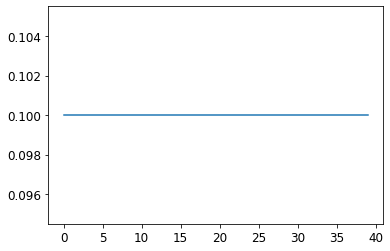

In [135]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [136]:
learn.recorder.values[-1][2]

0.10000000149011612